# Invoking Foundational Models

code snippets from this section

In [2]:
#%pip install --upgrade --quiet pydantic-ai-slim[anthropic] anthropic

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from dotenv import load_dotenv
load_dotenv("../keys.env")
assert os.environ["ANTHROPIC_API_KEY"][:2] == "sk",\
       "Please specify the ANTHROPIC_API_KEY access token in keys.env file"

## Invoke anthropic package directly

In [2]:
import anthropic

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ["ANTHROPIC_API_KEY"],
)

completion = client.messages.create(
    model="claude-3-7-sonnet-latest",
    system="You are an expert Python programmer.",
    max_tokens=1024,
    temperature=0.3,
    messages=[
        {
            "role": "user",
            "content": [
               {
                  "type": "text",
                  "text": "Write code to find the median of a list of integers."
               }
            ]
        }
    ]
)

print(completion.content[0].text)

# Finding the Median of a List of Integers

```python
def find_median(numbers):
    """
    Calculate the median value from a list of integers.
    
    Args:
        numbers (list): A list of integers
        
    Returns:
        float: The median value
    """
    # Handle empty list
    if not numbers:
        raise ValueError("Cannot calculate median of an empty list")
    
    # Sort the list
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    
    # If the list has an odd number of elements
    if n % 2 == 1:
        return sorted_numbers[n // 2]
    
    # If the list has an even number of elements
    # Return the average of the two middle elements
    else:
        middle1 = sorted_numbers[n // 2 - 1]
        middle2 = sorted_numbers[n // 2]
        return (middle1 + middle2) / 2
```

## Example Usage:

```python
# Example with odd number of elements
odd_list = [3, 1, 4, 1, 5]
print(f"Median of {odd_list}: {find_median(odd_list)}")  # Output: 3

# Example wit

## Anthropic through PydanticAI

In [4]:
# Needed in Jupyter environment See: https://ai.pydantic.dev/troubleshooting/ 
import nest_asyncio
nest_asyncio.apply()

In [5]:
from pydantic_ai import Agent

agent = Agent('anthropic:claude-3-7-sonnet-latest',
              system_prompt="You are an expert Python programmer.")

result = agent.run_sync("Write code to find the median of a list of integers.")
print(result.data)


# Finding the Median of a List of Integers

The median is the middle value of a sorted list. If the list has an odd number of elements, the median is the middle element. If the list has an even number of elements, the median is the average of the two middle elements.

Here's a Python function to find the median of a list of integers:

```python
def find_median(nums):
    """
    Calculate the median of a list of integers.
    
    Args:
        nums: A list of integers
        
    Returns:
        The median value
    """
    # Create a sorted copy of the input list
    sorted_nums = sorted(nums)
    
    # Find the length of the list
    n = len(sorted_nums)
    
    # If the list is empty, return None
    if n == 0:
        return None
    
    # If the list has an odd number of elements
    if n % 2 == 1:
        return sorted_nums[n // 2]
    
    # If the list has an even number of elements
    else:
        middle1 = sorted_nums[n // 2 - 1]
        middle2 = sorted_nums[n // 2]


## Softmax

graphs

In [1]:
logits = {
    "the": 5.2,
    "a": 3.8,
    "an": 2.1,
    "this": 1.5,
    "that": 0.9
}

In [2]:
logits2 = {
    "had": 3.0,
    "did": 2.9,
    "was": 2.8,
    "ate": 1.5,
    "ran": 1.4
}

In [3]:
import numpy as np

def logits_to_probs(logits):
    probs = { word: np.exp(logit) for word, logit in logits.items() }
    sigma = np.sum(list(probs.values()))
    probs = { word: value/sigma for word, value in probs.items() }
    return probs

probs = logits_to_probs(logits)
probs

{'the': 0.7519146085415931,
 'a': 0.1854198596096983,
 'an': 0.033873153382863015,
 'this': 0.018589980727712955,
 'that': 0.010202397738132567}

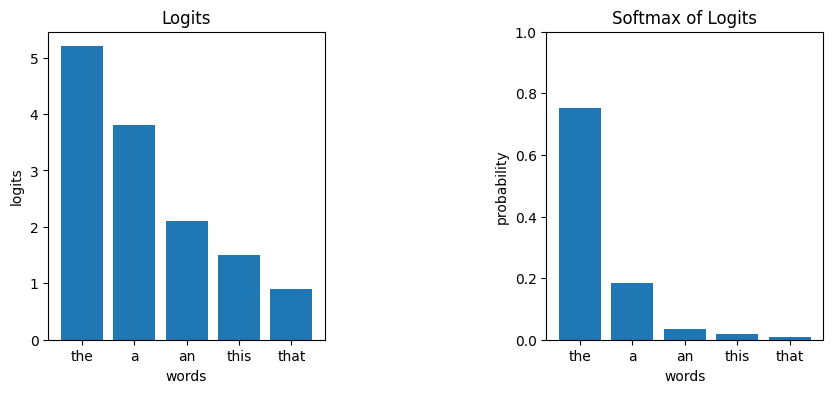

In [13]:
import matplotlib.pyplot as plt

def plot_bar_graph(ax, data_dict, title, xlabel, ylabel, is_prob=True):
  categories = list(data_dict.keys())
  values = list(data_dict.values())
  ax.bar(categories, values)
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  if is_prob:
    ax.set_ylim(0,1)

nrows=1
ncols=2
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
plt.subplots_adjust(wspace=0.8, hspace=0.4)
plot_bar_graph(axes[0], logits, "Logits", "words", "logits", is_prob=False)
plot_bar_graph(axes[1], probs, "Softmax of Logits", "words", "probability")

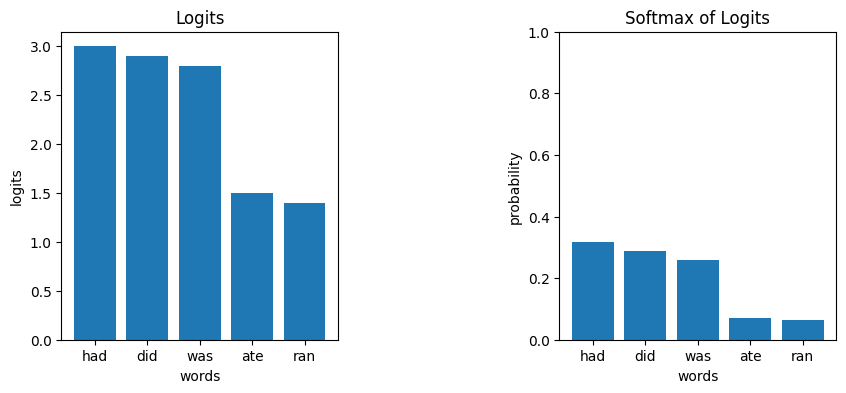

In [20]:
nrows=1
ncols=2
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
plt.subplots_adjust(wspace=0.8, hspace=0.4)
plot_bar_graph(axes[0], logits2, "Logits", "words", "logits", is_prob=False)
plot_bar_graph(axes[1], logits_to_probs(logits2), "Softmax of Logits", "words", "probability")

## Temperature

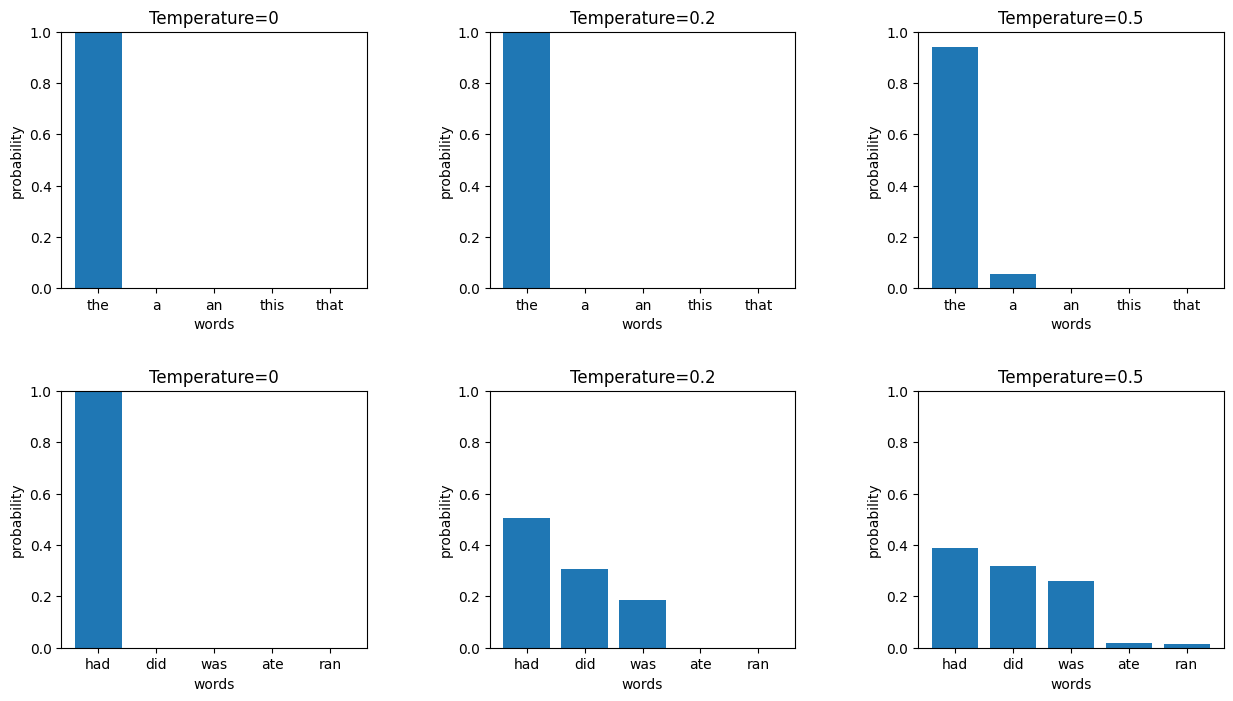

In [32]:
def scale_logits(logits, T):
    return { word: logit/T for word, logit in logits.items() }
nrows=2
ncols=3
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plot_bar_graph(axes[0,0], logits_to_probs(scale_logits(logits, 0.01)),
               "Temperature=0", "words", "probability")
plot_bar_graph(axes[0,1], logits_to_probs(scale_logits(logits, 0.2)),
               "Temperature=0.2", "words", "probability")
plot_bar_graph(axes[0,2], logits_to_probs(scale_logits(logits, 0.5)),
               "Temperature=0.5", "words", "probability")

plot_bar_graph(axes[1,0], logits_to_probs(scale_logits(logits2, 0.01)),
               "Temperature=0", "words", "probability")
plot_bar_graph(axes[1,1], logits_to_probs(scale_logits(logits2, 0.2)),
               "Temperature=0.2", "words", "probability")
plot_bar_graph(axes[1,2], logits_to_probs(scale_logits(logits2, 0.5)),
               "Temperature=0.5", "words", "probability")

In [38]:
for T in [0, 0.2, 0.5, 0.8, 1.0]:
    agent = Agent('anthropic:claude-3-7-sonnet-latest', model_settings={
        "temperature": T
    }, system_prompt="Complete the sentence.")
    result = agent.run_sync("The trade war caused")
    print(T, ":  ", result.data)

0 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries.
0.2 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries.
0.5 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries. Many manufacturers were forced to reconsider their production strategies, while farmers faced reduced export opportunities as retaliatory tariffs limited access to international markets. The long-term effects included accelerated efforts to diversify supply chains away from affected regions and renewed debates about the effectiveness of protectionist trade policies.
0.8 :   The trade war caused significant disruptions to global supply

Saved:
    <pre>
0 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries.
0.2 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries.
0.5 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries. Many manufacturers were forced to reconsider their production strategies, while farmers faced reduced export opportunities as retaliatory tariffs limited access to international markets. The long-term effects included accelerated efforts to diversify supply chains away from affected regions and renewed debates about the effectiveness of protectionist trade policies.
0.8 :   The trade war caused significant disruptions to global supply chains, forcing many companies to reconsider their manufacturing strategies and sourcing policies. It led to increased tariffs on imported goods, higher prices for consumers, and economic uncertainty in affected industries. Several businesses reported decreased profits as they absorbed additional costs or lost market share in foreign markets. The prolonged tension also contributed to volatility in financial markets and complicated diplomatic relations between the involved nations.
1.0 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses in affected industries. Many manufacturers were forced to reconsider their sourcing strategies, while farmers in certain regions faced reduced export opportunities and falling commodity prices. The long-term impacts included accelerated shifts in international trade patterns and renewed debates about economic nationalism versus globalization.    
    </pre>

In [53]:
for top_k in [1, 10, 100]:
    agent = Agent('anthropic:claude-3-7-sonnet-latest', model_settings={
        "temperature": 0.95,
        "top_k": top_k
    }, system_prompt="Complete the sentence.")
    result = agent.run_sync("The spaceship")
    print(top_k, ":  ", result.data)

1 :   The spaceship zoomed through the vast expanse of space, its powerful engines glowing blue against the darkness as it carried its crew toward distant stars and unknown adventures.
10 :   The spaceship glided silently through the vast emptiness of space, its powerful engines propelled it toward the distant galaxy where no human had ventured before.
100 :   The spaceship soared through the starry expanse, its gleaming hull reflecting the distant light of alien suns as it carried its crew toward unexplored worlds beyond the edge of known space.


Saved:
    <pre>
1 :   The spaceship zoomed through the vast expanse of space, its powerful engines glowing blue against the darkness as it carried its crew toward distant stars and unknown adventures.
10 :   The spaceship glided silently through the vast emptiness of space, its powerful engines propelled it toward the distant galaxy where no human had ventured before.
100 :   The spaceship soared through the starry expanse, its gleaming hull reflecting the distant light of alien suns as it carried its crew toward unexplored worlds beyond the edge of known space.
    </pre>

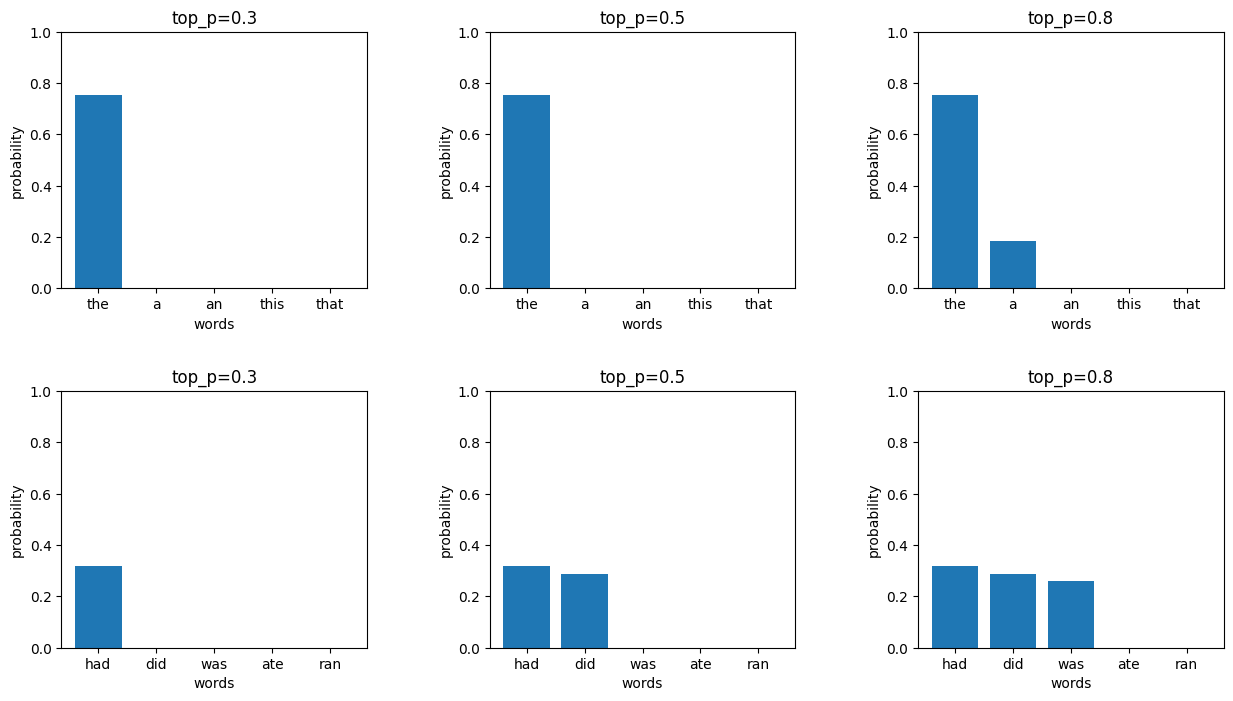

In [57]:
def apply_top_p(probs, top_p):
    # assumes the dict is sorted by value
    result = {}
    sum_so_far = 0
    for word, prob in probs.items():
        if sum_so_far < top_p:
            result[word] = prob
        else:
            result[word] = 0
        sum_so_far += prob
    return result

nrows=2
ncols=3
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plot_bar_graph(axes[0,0], apply_top_p(logits_to_probs(logits), 0.3),
               "top_p=0.3", "words", "probability")
plot_bar_graph(axes[0,1], apply_top_p(logits_to_probs(logits), 0.5),
               "top_p=0.5", "words", "probability")
plot_bar_graph(axes[0,2], apply_top_p(logits_to_probs(logits), 0.8),
               "top_p=0.8", "words", "probability")

plot_bar_graph(axes[1,0], apply_top_p(logits_to_probs(logits2), 0.3),
               "top_p=0.3", "words", "probability")
plot_bar_graph(axes[1,1], apply_top_p(logits_to_probs(logits2), 0.5),
               "top_p=0.5", "words", "probability")
plot_bar_graph(axes[1,2], apply_top_p(logits_to_probs(logits2), 0.8),
               "top_p=0.8", "words", "probability")